# Prediction Using Supervised ML

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Data

In [3]:
df = pd.read_csv('scores.csv')

In [4]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## 2. EDA

### 2.1 Univariate Analysis

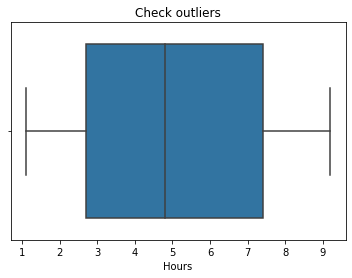

In [6]:
sns.boxplot(df['Hours'])
plt.title('Check outliers')
plt.show()

There are no outliers present in the given data.

### 2.2 Regression graph

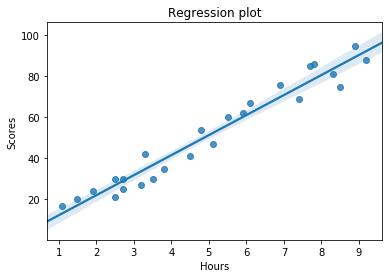

In [7]:
sns.regplot(x='Hours', y='Scores', data=df)
plt.title('Regression plot')
plt.show()

The data shows a positive linear trend between the total hours and the Scores

### 2.3 Data Distribution

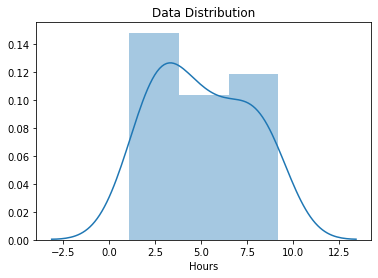

In [8]:
sns.distplot(df['Hours'])
plt.title('Data Distribution')
plt.show()

The data distribution almost represents gaussian distribution

### 2.4 Correlation Analysis

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## 3 Base Model

In [10]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

from statsmodels.api import OLS

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [11]:
def base_model(X_train, X_test, y_train, y_test):
    """Function to run and evaluate various algorithms"""
    mods = [
        ('lr', LinearRegression()),
        ('lda', LinearDiscriminantAnalysis()),
        ('la', Lasso()),
        ('ri', Ridge()),
        ('en', ElasticNet()),
        ('svr', SVR(kernel='linear')),
        ('xgb', XGBRegressor()),
        ('dtr', DecisionTreeRegressor()),
        ('etr', ExtraTreeRegressor()),
        ('rfr', RandomForestRegressor()),
        ('ada', AdaBoostRegressor()),
        ('gbm', GradientBoostingRegressor())
    ]
    
    # Empty lists
    tr_sc, te_sc, models, rmse, mae = [], [], [], [], []
    
    for name, model in mods:
        clf = model # Assign variable
        clf.fit(X_train, y_train) # Fit data
        y_pre = clf.predict(X_test) # Prediction
        
        # Training Accuracy
        acc_tr = round(model.score(X_train, y_train))
        tr_sc.append(acc_tr)
        
        # Testing Accuracy
        acc_te = round(model.score(X_test, y_test))
        te_sc.append(acc_te)
        
        # Root Mean Squared Error
        rmse_sc = round(np.sqrt(mean_squared_error(y_test, y_pre)), 2)
        rmse.append(rmse_sc)
        
        # Mean Absolute Error
        mae_sc = round(mean_absolute_error(y_test, y_pre), 2)
        mae.append(mae_sc)
        
        # Model Name
        models.append(name)
    
    x = {
        "model": models, "Train Accuracy": tr_sc, "Test Accuracy": te_sc, "RMSE": rmse, "MAE": mae
    }
    
    return pd.DataFrame(x)

### Split data

In [12]:
# Independent Feature
X = df.iloc[:, :-1].values

# Dependent Feature
y = df.iloc[:, 1].values

### Split into Train and Test data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

### Base Models

In [14]:
base_model(X_train, X_test, y_train, y_test)

,model,Train Accuracy,Test Accuracy,RMSE,MAE
0,lr,1,1,5.29,4.85
1,lda,1,0,6.87,6.00
2,la,1,1,5.24,4.76
3,ri,1,1,5.26,4.81
4,en,1,1,5.24,4.40
5,svr,1,1,5.29,4.49
6,xgb,1,1,6.97,6.20
7,dtr,1,1,6.87,6.00
8,etr,1,1,6.87,6.00
9,rfr,1,1,6.19,4.83


The best predictions are from Elatic Net and SVR

In [15]:
def output(model, h):
    """Get the score as output for the hours given"""
    regressor = model # Assign variable
    
    regressor.fit(X_train, y_train) # Fit the model
    
    hours = np.array(h).reshape([1,-1]) # Reshape data
    
    pred = regressor.predict(hours) # Make Prediction
    
    print("Hours of study :", hours[0][0])
    print("Predicted Score :", pred[0])

#### Linear Regression

In [16]:
output(LinearRegression(), 9.25)

Hours of study : 9.25
Predicted Score : 93.18548035389907


### Elastic Net

In [17]:
output(ElasticNet(), 9.25)

Hours of study : 9.25
Predicted Score : 90.17724390269694
